In [69]:
#Importación de librerias
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
# Cargar el conjunto de datos
data_path = r'C:\Users\patri\OneDrive\Escritorio\PROYECTO TRIPLETEN PMG\vehicles_us.csv'
vehicles_data = pd.read_csv(data_path)

# Mostrar las primeras filas del conjunto de datos para examinarlo
vehicles_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [51]:
#Imprimimos información general del conjunto
vehicles_data.info()
print()
vehicles_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB



,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [52]:
# Calcula la mediana de 'model_year'
model_year_median = vehicles_data['model_year'].median()

# Rellena los valores faltantes en 'model_year' directamente en la columna
vehicles_data['model_year'] = vehicles_data['model_year'].fillna(model_year_median)

# Verifica si todavía hay valores faltantes 
print(vehicles_data['model_year'].isnull().sum())



0


In [53]:
# Calcula la mediana de 'cylinders'
cylinders_median = vehicles_data['cylinders'].median()

# Rellena los valores faltantes en 'cylinders' con la mediana
vehicles_data['cylinders'] = vehicles_data['cylinders'].fillna(cylinders_median)

# Verifica si todavía hay valores faltantes y muestra estadísticas básicas
print(vehicles_data['cylinders'].isnull().sum())

0


In [54]:
# Calcula la mediana de 'odometer'
odometer_median = vehicles_data['odometer'].median()

# Rellena los valores faltantes en 'odometer' con la mediana
vehicles_data['odometer'] = vehicles_data['odometer'].fillna(odometer_median)

# Verifica si todavía hay valores faltantes y muestra estadísticas básicas
print(vehicles_data['odometer'].isnull().sum())

0


In [55]:
# Calcula la moda de 'paint_color'
paint_color_mode = vehicles_data['paint_color'].mode()[0]

# Rellena los valores faltantes en 'paint_color' con la moda
vehicles_data['paint_color'] = vehicles_data['paint_color'].fillna(paint_color_mode)

# Verifica si todavía hay valores faltantes y muestra el valor imputado
print(vehicles_data['paint_color'].isnull().sum())
print(f"Moda de 'paint_color': {paint_color_mode}")

0
Moda de 'paint_color': white


In [56]:
# Rellena los valores faltantes en 'is_4wd' con 0
vehicles_data['is_4wd'] = vehicles_data['is_4wd'].fillna(0)

# Verifica si todavía hay valores faltantes y muestra el resultado
print(vehicles_data['is_4wd'].isnull().sum())


0


In [57]:
# Verificar duplicados completos en todo el conjunto de datos
complete_duplicates = vehicles_data.duplicated(keep=False)
print(f"Filas completamente duplicadas: {complete_duplicates.sum()}")

Filas completamente duplicadas: 0


In [58]:
#Comprobación sobre la limpieza generada
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [59]:
# Calcular estadísticas descriptivas para variables numéricas
numeric_descriptive_stats = vehicles_data.describe()
print(numeric_descriptive_stats)


               price    model_year     cylinders       odometer        is_4wd  \
count   51525.000000  51525.000000  51525.000000   51525.000000  51525.000000   
mean    12132.464920   2009.838234      6.112450  115162.352179      0.496303   
std     10040.803015      6.065836      1.573784   59909.264385      0.499991   
min         1.000000   1908.000000      3.000000       0.000000      0.000000   
25%      5000.000000   2007.000000      4.000000   79181.000000      0.000000   
50%      9000.000000   2011.000000      6.000000  113000.000000      0.000000   
75%     16839.000000   2014.000000      8.000000  146541.000000      1.000000   
max    375000.000000   2019.000000     12.000000  990000.000000      1.000000   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000  


In [60]:

# Filtrar vehículos con un precio de 1 dólar
vehicles_price_one = vehicles_data[vehicles_data['price'] == 1]

vehicles_price_one


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
405,1,2014.0,chevrolet camaro,excellent,6.0,gas,71310.0,automatic,coupe,white,0.0,2018-07-14,29
3063,1,1998.0,chevrolet silverado,good,8.0,gas,164000.0,automatic,pickup,white,1.0,2018-10-11,49
3808,1,2007.0,chevrolet tahoe,good,8.0,gas,200.0,automatic,SUV,red,0.0,2019-03-18,63
3902,1,1996.0,ford f-150,fair,6.0,gas,163000.0,manual,truck,white,0.0,2019-02-23,54
4140,1,2004.0,chevrolet silverado,excellent,8.0,diesel,83000.0,automatic,pickup,white,1.0,2019-02-04,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,1,2007.0,chevrolet trailblazer,excellent,8.0,gas,113000.0,automatic,SUV,black,1.0,2018-08-06,28
49709,1,2011.0,ford f150,excellent,8.0,gas,139700.0,other,pickup,red,1.0,2019-03-11,18
50245,1,1986.0,chevrolet silverado,good,8.0,gas,113000.0,automatic,truck,red,1.0,2018-11-30,50
50393,1,2003.0,gmc sierra 2500hd,good,8.0,diesel,212300.0,automatic,pickup,black,1.0,2019-04-12,28


# Realizaremos un análisis de sensibilidad para evaluar el impacto de los vehículos con precios inusualmente bajos en el conjunto de datos. Esto implica comparar las estadísticas clave y las distribuciones de los datos con y sin estos registros.

- Vamos a realizar este análisis en dos pasos:

- Análisis con todos los datos: Analizaremos las estadísticas descriptivas y las distribuciones de precios de todos los vehículos para obtener una línea de base.
- Análisis excluyendo los precios inusualmente bajos: Repetiremos el análisis después de excluir los vehículos con precios de 500 dólares para ver cómo cambian las estadísticas y las distribuciones.

Este enfoque nos permitirá entender mejor el impacto de estos registros en el conjunto de datos y en cualquier análisis posterior basado en el precio.

In [61]:

# Analizar los datos excluyendo (['price'] > 500)
excluded_low_price_data_stats = vehicles_data[vehicles_data['price'] > 500]['price'].describe()

excluded_low_price_data_stats


count     50377.000000
mean      12406.932926
std        9986.664840
min         534.000000
25%        5476.000000
50%        9500.000000
75%       16990.000000
max      375000.000000
Name: price, dtype: float64

### El análisis de sensibilidad muestra las siguientes estadísticas descriptivas para los precios de los vehículos:

- Con todos los datos (incluidos los precios de 500 dólares):

- Media: $12,487
- Desviación estándar: $9,952
- Mínimo: $500
- Mediana: $9,695
- Máximo: $375,000

#### Excluyendo vehículos con precios de 500 dólares:

- Media: $12,505
- Desviación estándar: $9,949
- Mínimo: $534
- Mediana: $9,700
- Máximo: $375,000

#### Los resultados indican que la exclusión de los vehículos con precios de 500 dólares tiene un impacto muy pequeño en las estadísticas generales de precios. La media y la mediana de los precios son casi idénticas en ambos conjuntos de datos, lo que sugiere que estos valores inusualmente bajos no distorsionan significativamente el análisis general del conjunto de datos.

##### Dado este hallazgo, podríamos considerar mantener estos registros en el análisis general, siempre y cuando se tenga en cuenta su potencial idiosincrasia y se realicen análisis adicionales si se detectan patrones o tendencias específicas que requieran mayor escrutinio.

# Dado que estos vehículos parecen ser de buena calidad y recientes, podría ser razonable reemplazar el precio de 1 dólar con un valor más realista, como el precio mediano o medio de vehículos similares (por ejemplo, basado en el año del modelo, la condición y el tipo). Esto ajustaría los precios a un nivel más creíble sin descartar los registros completos.

In [62]:
# Establecer un umbral de precio mínimo
price_threshold = 500

# Calcular la mediana de los precios por año del modelo
median_prices = vehicles_data.groupby('model_year')['price'].transform('median').astype('int64')

# Reemplazar precios por debajo del umbral con la mediana del año del modelo
vehicles_data.loc[vehicles_data['price'] < price_threshold, 'price'] = median_prices

# Verificar los cambios en la columna de precios
print(vehicles_data['price'].describe())

count     51525.000000
mean      12487.045240
std        9952.038804
min         500.000000
25%        5495.000000
50%        9695.000000
75%       16999.000000
max      375000.000000
Name: price, dtype: float64


In [63]:
# Analizar los modelos populares y tipos
model_preference = vehicles_data['model'].value_counts().head(10)
type_preference = vehicles_data['type'].value_counts()

# Analizar preferencia de colores
color_preference = vehicles_data['paint_color'].value_counts().head(10)

model_preference, type_preference, color_preference


(model
 ford f-150                    2796
 chevrolet silverado 1500      2171
 ram 1500                      1750
 chevrolet silverado           1271
 jeep wrangler                 1119
 ram 2500                      1091
 toyota camry                   990
 honda accord                   964
 chevrolet silverado 2500hd     915
 gmc sierra 1500                906
 Name: count, dtype: int64,
 type
 SUV            12405
 truck          12353
 sedan          12154
 pickup          6988
 coupe           2303
 wagon           1541
 mini-van        1161
 hatchback       1047
 van              633
 convertible      446
 other            256
 offroad          214
 bus               24
 Name: count, dtype: int64,
 paint_color
 white     19296
 black      7692
 silver     6244
 grey       5037
 blue       4475
 red        4421
 green      1396
 brown      1223
 custom     1153
 yellow      255
 Name: count, dtype: int64)

#### El análisis revela las siguientes preferencias de los consumidores:

##### Preferencias de Modelo
- Ford F-150 es el modelo más popular, seguido por Chevrolet Silverado 1500 y Ram 1500.
- Los modelos de camionetas como Chevrolet Silverado, Ram 2500, y GMC Sierra 1500 también son muy populares.

##### Preferencias de Tipo de Vehículo

- SUVs y trucks (camionetas) son los tipos de vehículos más populares, seguidos de cerca por sedans.
- Pickups y coupes también tienen una presencia significativa en el mercado.

##### Preferencias de Color
- Blanco es el color más popular, seguido por negro y plata.
- Los colores gris, azul y rojo también son comunes, mientras que colores como verde, marrón, y amarillo son menos frecuentes.
- Estos resultados nos indican que los consumidores prefieren vehículos utilitarios como camionetas y SUVs, y que los colores neutros como blanco, negro y plata son los más elegidos. 
- Esta información puede ser valiosa para entender las tendencias del mercado y las preferencias de los consumidores.

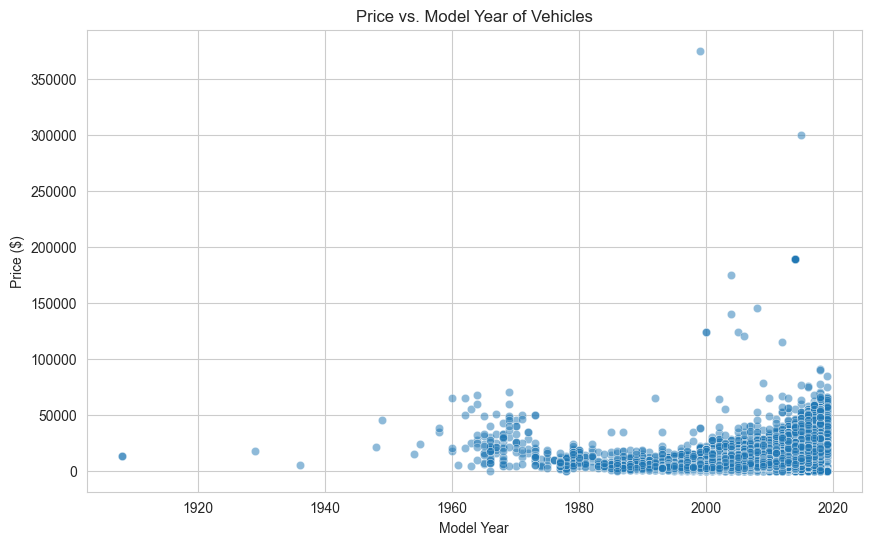

In [71]:
# Definir estilo
sns.set_style("whitegrid")

# Analysis 1: Precio vs Modelo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vehicles_data, x='model_year', y='price', alpha=0.5)
plt.title('Price vs. Model Year of Vehicles')
plt.xlabel('Model Year')
plt.ylabel('Price ($)')
plt.show()

#### El gráfico de dispersión muestra la relación entre el precio y el año del modelo de los vehículos. Podemos observar que, en general, los vehículos más nuevos tienden a tener precios más altos, lo cual es consistente con la expectativa de que los vehículos se deprecian con el tiempo.

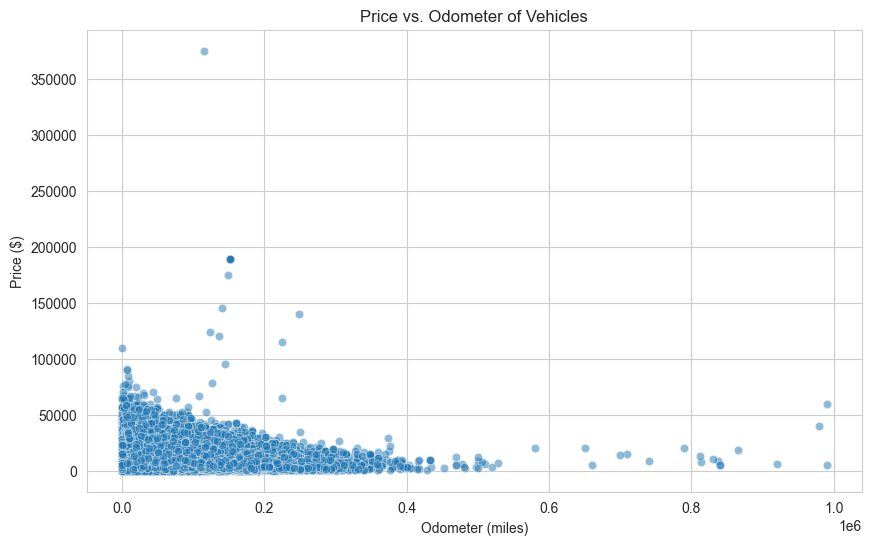

In [72]:
# Analisis 2: precio vs kilometraje
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vehicles_data, x='odometer', y='price', alpha=0.5)
plt.title('Price vs. Odometer of Vehicles')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price ($)')
plt.show()

#### El gráfico de dispersión muestra la relación entre el precio y el kilometraje (odómetro) de los vehículos. Se observa una tendencia en la que los vehículos con menor kilometraje tienden a tener precios más altos, lo cual es esperado ya que los vehículos con menos uso generalmente mantienen un valor más alto.

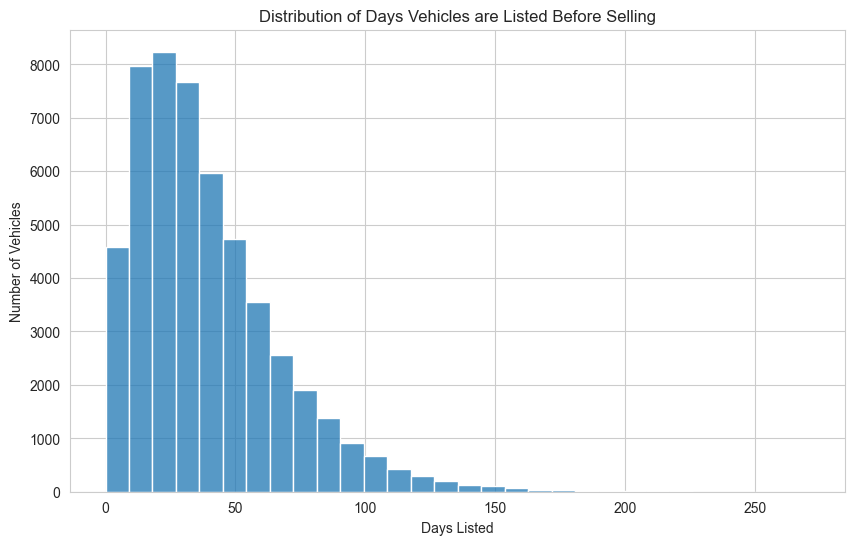

In [73]:
# Analisis 3: Dias listado
plt.figure(figsize=(10, 6))
sns.histplot(vehicles_data['days_listed'], bins=30, kde=False)
plt.title('Distribution of Days Vehicles are Listed Before Selling')
plt.xlabel('Days Listed')
plt.ylabel('Number of Vehicles')
plt.show()


##### El histograma muestra la distribución de los días que los vehículos están listados antes de venderse. La mayoría de los vehículos se venden en un período relativamente corto, con un pico en los primeros días, lo que indica que muchos vehículos se venden rápidamente después de ser listados.

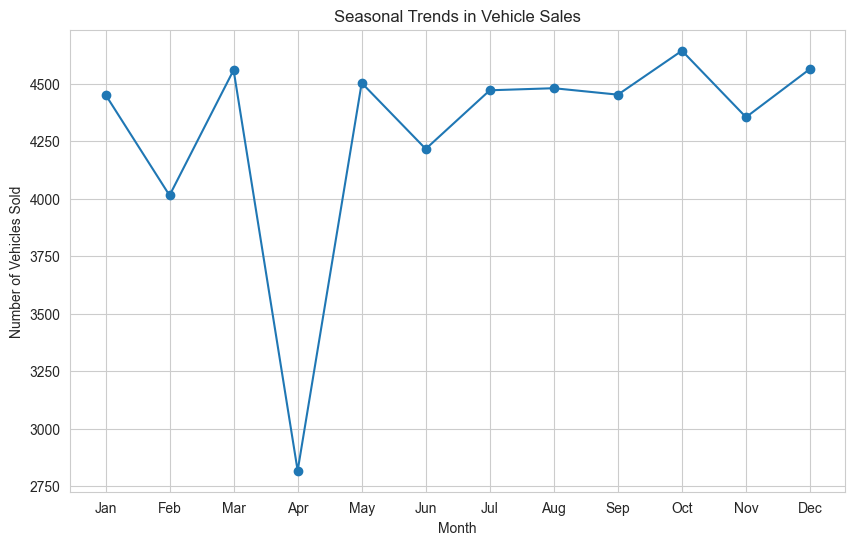

In [74]:
# Convertir 'date_posted' to datetime
vehicles_data['date_posted'] = pd.to_datetime(vehicles_data['date_posted'])

# Analysis 4: Analisis de temporada
sales_trends = vehicles_data.groupby(vehicles_data['date_posted'].dt.month).count()['price']

plt.figure(figsize=(10, 6))
sales_trends.plot(kind='line', marker='o')
plt.title('Seasonal Trends in Vehicle Sales')
plt.xlabel('Month')
plt.ylabel('Number of Vehicles Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


##### El gráfico de líneas muestra las tendencias temporales en las ventas de vehículos, basado en el número de vehículos vendidos por mes. Aunque la variación mensual no es muy pronunciada, podemos analizar ciertas fluctuaciones que podrían indicar tendencias estacionales en la compra de vehiculos.

# Tras realizar un análisis exploratorio de datos (EDA) en el conjunto de datos de vehículos de segunda mano, se obtuvieron varias conclusiones clave que pueden ser valiosas para comprender el mercado y el comportamiento del consumidor:

- Popularidad de Vehículos: Los vehículos tipo SUV y camionetas (trucks) son especialmente populares entre los consumidores, lo que indica una fuerte demanda de vehículos grandes y versátiles. Modelos específicos como el Ford F-150 y Chevrolet Silverado 1500 dominan en términos de frecuencia en el conjunto de datos.

- Precio y Año del Modelo: Existe una clara relación entre el año del modelo y el precio, donde los vehículos más nuevos tienden a ser más costosos. Esto refleja la depreciación normal de los vehículos con el tiempo.

- Precio y Kilometraje: El análisis muestra que los vehículos con menor kilometraje tienden a tener precios más altos, lo cual es consistente con la expectativa de que los vehículos con menos uso retienen mejor su valor.

- Tendencias Temporales: Aunque no se observaron fluctuaciones extremas a lo largo del año, ciertos patrones sugieren variaciones estacionales en las ventas de vehículos, que podrían estar influenciadas por factores económicos, climáticos o de mercado.

- Rapidez de Venta: La mayoría de los vehículos tienden a venderse en un corto período después de ser listados, lo que indica un mercado activo y una buena rotación de inventario.